In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = 'drive/My Drive/Datasets'

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/50_Startups.csv')
#first ten rows
dataset.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,NaN,California,NaN
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,NaN
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,NaN,362861.36,NaN,156991.12
6,NaN,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,NaN
8,120542.52,148718.95,311613.29,NaN,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [25]:
print("type: ", type(dataset))
print("shape: ", dataset.shape)

type:  <class 'pandas.core.frame.DataFrame'>
shape:  (50, 5)


**There are 50 rows and 5 columns in the 50_Startups.csv.**

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        45 non-null     float64
 1   Administration   46 non-null     float64
 2   Marketing Spend  48 non-null     float64
 3   State            46 non-null     object 
 4   Profit           34 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


**R&D Spend, Administration, Marketing Spend and Profit are Continuous Variables while the State is a Nominal Variable.**

In [27]:
#missing values
null=dataset.isnull().sum()
print(null)

R&D Spend           5
Administration      4
Marketing Spend     2
State               4
Profit             16
dtype: int64


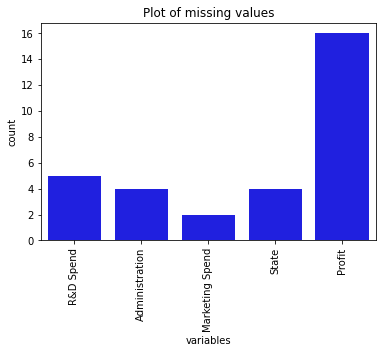

In [28]:
#missing variables plot
sb.barplot(x=null.index.values, y=null, color='b')
plt.title("Plot of missing values")
plt.xlabel("variables")
plt.ylabel("count")
plt.xticks(rotation=90);

In [29]:
#delete missing rows
dataset.dropna(how="all",inplace=True)
# missing value implementation
dataset[['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']].describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,45.000000,46.000000,48.000000,34.000000
mean,73382.444444,121952.295000,200834.512917,112148.650882
std,46351.093750,28090.528796,123457.377487,40040.847823
min,0.000000,51283.140000,0.000000,14681.400000
25%,38558.510000,106483.065000,115395.745000,90138.902500
50%,73994.560000,123467.895000,203322.230000,107978.190000
75%,100671.960000,144842.180000,298932.675000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


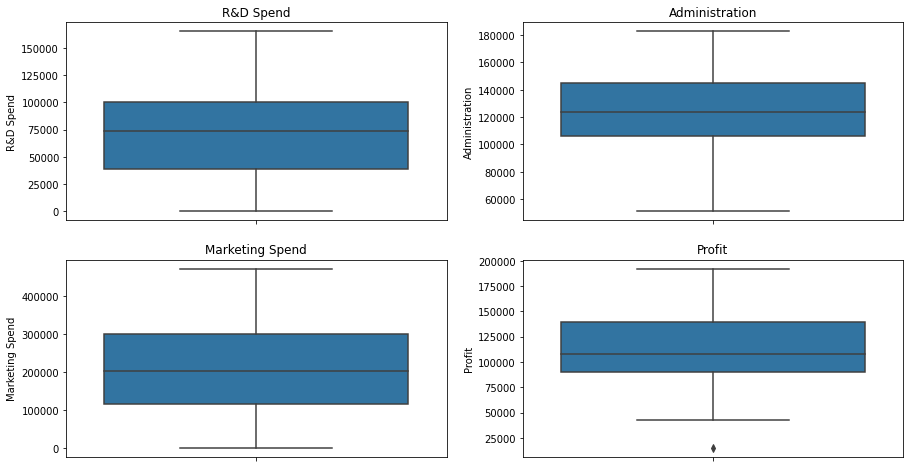

In [36]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sb.boxplot(y='R&D Spend',data=dataset)
plt.title("R&D Spend")
plt.subplot(2,2,2)
sb.boxplot(y='Administration',data=dataset)
plt.title("Administration")
plt.subplot(2,2,3)
sb.boxplot(y='Marketing Spend',data=dataset)
plt.title("Marketing Spend")
plt.subplot(2,2,4)
sb.boxplot(y='Profit',data=dataset)
plt.title("Profit");

From the above four plot we say that mean is good estimate for missing values in case of R&D Spend , Administration, Marketing Spend

but in profit there is a outlier there we cant use mean as estimator so we use median.

In [39]:
dataset['R&D Spend'].fillna(73382.44,inplace=True)
dataset['Administration'].fillna(121952.29,inplace=True)
dataset['Marketing Spend'].fillna(200834.51,inplace=True)
dataset['Profit'].fillna(107978.19,inplace=True)
# column state 
dataset['State'].fillna(method='ffill',inplace=True)
#now our data is ready to use 
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,200834.51,California,107978.19
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,107978.19
4,142107.34,91391.77,366168.42,Florida,166187.94


In [40]:
#the correlation between variable
dataset.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.236130,0.662131,0.749637
Administration,0.236130,1.000000,-0.065876,0.109865
Marketing Spend,0.662131,-0.065876,1.000000,0.529598
Profit,0.749637,0.109865,0.529598,1.000000


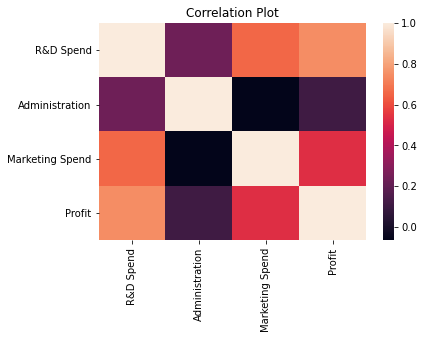

In [41]:
sb.heatmap(dataset.corr())
plt.title("Correlation Plot");

from above plot we see that there is high correlation between profit and R&D spend

there is low correlation in Marketing spend and R&D spend

but there is no correlation between marketing spend and administartion

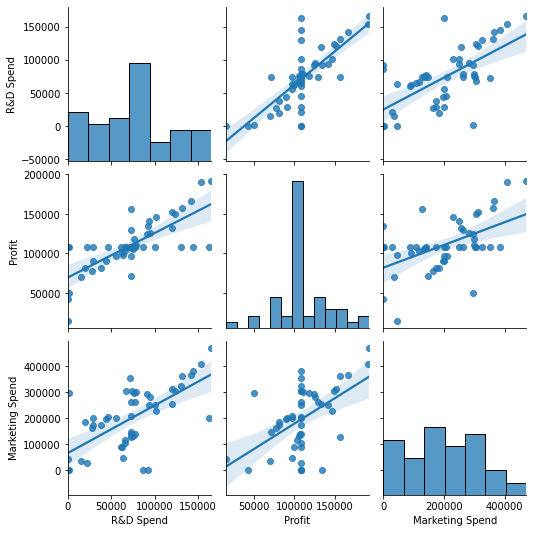

In [43]:
# the relationship between profit and R&D spend , MArketing spend and R&D spend
sb.pairplot(dataset[['R&D Spend', 'Profit','Marketing Spend']],kind='reg');


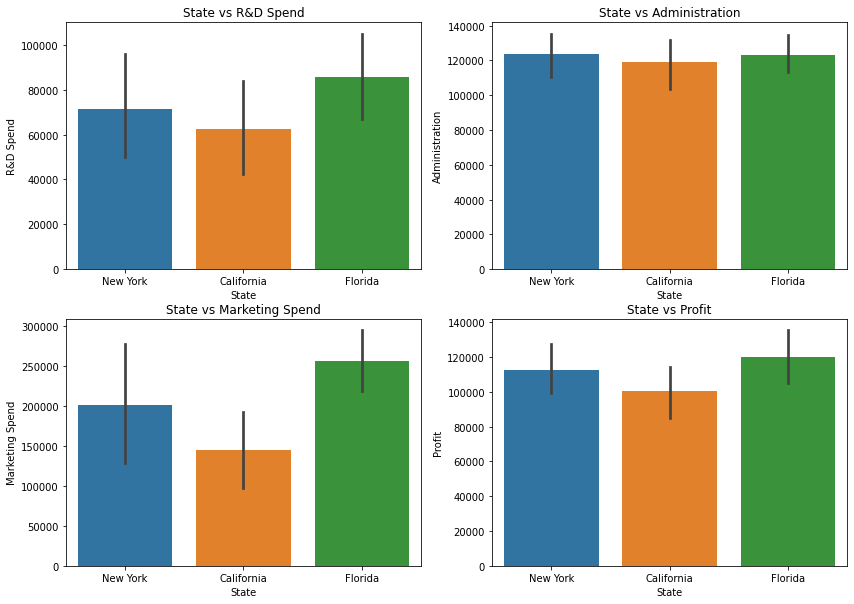

In [46]:
# statewise profit, R&D spend, MArketing spend, and R&D spend
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sb.barplot(x='State',y="R&D Spend",data=dataset)
plt.title("State vs R&D Spend")
plt.subplot(2,2,2)
sb.barplot(x='State',y="Administration",data=dataset)
plt.title("State vs Administration")
plt.subplot(2,2,3)
sb.barplot(x='State',y="Marketing Spend",data=dataset)
plt.title("State vs Marketing Spend")
plt.subplot(2,2,4)
sb.barplot(x='State',y="Profit",data=dataset)
plt.title("State vs Profit");
